# **Set Up**

In [88]:
import os
from zipfile import ZipFile

import pandas as pd 
import numpy as np
import kaggle

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import StandardScaler

# **Import Data**

In [4]:
! kaggle datasets download -d carrie1/ecommerce-data


  0%|          | 0.00/7.20M [00:00<?, ?B/s]
 14%|█▍        | 1.00M/7.20M [00:00<00:02, 2.84MB/s]
 42%|████▏     | 3.00M/7.20M [00:00<00:00, 7.43MB/s]
 83%|████████▎ | 6.00M/7.20M [00:00<00:00, 12.7MB/s]
100%|██████████| 7.20M/7.20M [00:00<00:00, 10.9MB/s]


In [2]:
# Check The Contents Of ZIP File

with ZipFile("ecommerce-data.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()
    print('No. Of Files In Zip File: ',len(list_of_files),'\n')
    print(list_of_files)

No. Of Files In Zip File:  1 

['data.csv']


In [11]:
# Extract Zip File Contents In Main Directory

with ZipFile("ecommerce-data.zip", "r") as zip_ref:
    # Get list of file names in zip
    list_of_files = zip_ref.namelist()

    for file in list_of_files:
        file_content = zip_ref.read(file)
        with open(os.path.basename(file), "wb") as f:
                f.write(file_content)

In [6]:
# Read The CSV File Directly From ZIP File

# ZIP_file = ZipFile("ecommerce-data.zip", "r")
# CSV_file = ZIP_file.read('data.csv')

In [13]:
df = pd.read_csv('data.csv',encoding='unicode_escape')

# **Data Exploration**

In [14]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [17]:
df.shape

(541909, 8)

In [32]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# No Of Unique CustomerID
print(len(df['CustomerID'].unique()))

4373


In [21]:
# No Of StockCode
print(len(df['StockCode'].unique()))

4070


In [22]:
# No Countries Of Operation
print(len(df['Country'].unique()))

38


In [30]:
# Check Statistical Summary Of UnitPrice Column

df['UnitPrice'].describe()

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

In [36]:
# Check Statistical Summary Of UnitPrice Where CustomerID is Unavailable

df[df['CustomerID'].isna()].loc[:,'UnitPrice'].describe()

count    135080.000000
mean          8.076577
std         151.900816
min      -11062.060000
25%           1.630000
50%           3.290000
75%           5.450000
max       17836.460000
Name: UnitPrice, dtype: float64

In [35]:
# Check Statistical Summary Of UnitPrice Where CustomerID is Available
df[df['CustomerID'].notnull()].loc[:,'UnitPrice'].describe()

count    406829.000000
mean          3.460471
std          69.315162
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [37]:
# Visualize Price Distribution Of Items On Sale

px.histogram(df[df['CustomerID'].notnull()].loc[:,'UnitPrice'])

In [31]:
# Check the Data Where UnitPrice Values are negative

df[df['UnitPrice']==-11062.060000]

InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

In [38]:
# Check Data Where Customer ID Is Missing

df[df['CustomerID'].isna()]

InvoiceNo StockCode                      Description  Quantity  \
622       536414     22139                              NaN        56   
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Country  
622     12/1/2010 11:52       0.00         NaN  United Kingdom  
1443    12/1/2010 14:32       2.51         NaN  United Kingdom  
1444    12/1/2010 14:32       2.51         NaN  United Kingdom  
1445    12/1/2010 14:32       0.85         NaN  United Kingdom  
1446    12/1/2010 14:32       1.66         NaN  United Kingdom  
...                 ...        ...         ...             ...  
541536  12/9/2011 10:26       4.13         NaN  United Kingdom  
541537  12/9/2011 10:26       4.13         NaN  United Kingdom  
541538  12/9/2011 10:26       4.96         NaN  United Kingdom  
541539  12/9/2011 10:26      10.79         NaN  United Kingdom  
541540  12/9/2011 10:26    1714.17         NaN  United Kingdom  

[135080 rows x 8 columns]

In [39]:
# Check Data Where Product Description Is Missing

df[df['Description'].isna()]

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622       536414     22139         NaN        56  12/1/2010 11:52        0.0   
1970      536545     21134         NaN         1  12/1/2010 14:32        0.0   
1971      536546     22145         NaN         1  12/1/2010 14:33        0.0   
1972      536547     37509         NaN         1  12/1/2010 14:33        0.0   
1987      536549    85226A         NaN         1  12/1/2010 14:34        0.0   
...          ...       ...         ...       ...              ...        ...   
535322    581199     84581         NaN        -2  12/7/2011 18:26        0.0   
535326    581203     23406         NaN        15  12/7/2011 18:31        0.0   
535332    581209     21620         NaN         6  12/7/2011 18:35        0.0   
536981    581234     72817         NaN        27  12/8/2011 10:33        0.0   
538554    581408     85175         NaN        20  12/8/2011 14:06        0.0   

        CustomerID         Country  
622            NaN  United Kingdom  
1970           NaN  United Kingdom  
1971           NaN  United Kingdom  
1972           NaN  United Kingdom  
1987           NaN  United Kingdom  
...            ...             ...  
535322         NaN  United Kingdom  
535326         NaN  United Kingdom  
535332         NaN  United Kingdom  
536981         NaN  United Kingdom  
538554         NaN  United Kingdom  

[1454 rows x 8 columns]

In [42]:
# Confirm If All Rows With Missing Descriptions Also Have Missing CustomerID

df[df['Description'].isna()].loc[:,'CustomerID'].value_counts()

Series([], Name: count, dtype: int64)

# **Data Cleaning**

In [46]:
df = df.dropna()

In [48]:
print(df.shape)
df.isna().sum()

(406829, 9)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
dtype: int64

# **Data Processing**

In [49]:
# Convert InvoiceDate Column Into Datetime Format

df['Date'] = pd.to_datetime(df['InvoiceDate'])

## **Recency Score**

In [50]:
# keep only the most recent date of purchase

df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)

In [52]:
df[df['CustomerID']==17850.0]

InvoiceNo StockCode                          Description  Quantity  \
0        536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1        536365     71053                  WHITE METAL LANTERN         6   
2        536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3        536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4        536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...         ...       ...                                  ...       ...   
86898   C543611     82483   WOOD 2 DRAWER CABINET WHITE FINISH        -1   
86899   C543611     21874                    GIN AND TONIC MUG        -1   
86900   C543611     71477    COLOUR GLASS. STAR T-LIGHT HOLDER        -2   
86901   C543611     82483   WOOD 2 DRAWER CABINET WHITE FINISH        -1   
86902   C543611     21169      YOU'RE CONFUSING ME METAL SIGN         -2   

           InvoiceDate  UnitPrice  CustomerID         Country  \
0       12/1/2010 8:26       2.55     17850.0  United Kingdom   
1       12/1/2010 8:26       3.39     17850.0  United Kingdom   
2       12/1/2010 8:26       2.75     17850.0  United Kingdom   
3       12/1/2010 8:26       3.39     17850.0  United Kingdom   
4       12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                ...        ...         ...             ...   
86898  2/10/2011 14:38       4.95     17850.0  United Kingdom   
86899  2/10/2011 14:38       1.06     17850.0  United Kingdom   
86900  2/10/2011 14:38       2.75     17850.0  United Kingdom   
86901  2/10/2011 14:38       4.95     17850.0  United Kingdom   
86902  2/10/2011 14:38       1.45     17850.0  United Kingdom   

                     Date  rank  
0     2010-12-01 08:26:00     1  
1     2010-12-01 08:26:00     1  
2     2010-12-01 08:26:00     1  
3     2010-12-01 08:26:00     1  
4     2010-12-01 08:26:00     1  
...                   ...   ...  
86898 2011-02-10 14:38:00   298  
86899 2011-02-10 14:38:00   298  
86900 2011-02-10 14:38:00   298  
86901 2011-02-10 14:38:00   298  
86902 2011-02-10 14:38:00   298  

[312 rows x 10 columns]

In [61]:
df_rec = df[df['rank']==1]

In [64]:
# Create Recency Column

df_rec['recency'] = (df_rec['Date'] - pd.to_datetime(min(df_rec['Date']))).dt.days

C:\Users\c22080676\AppData\Local\Temp\ipykernel_26400\619809539.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
df_rec

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541801    581578     22993         SET OF 4 PANTRY JELLY MOULDS        12   
541802    581578     22907     PACK OF 20 NAPKINS PANTRY DESIGN        12   
541803    581578     22908        PACK OF 20 NAPKINS RED APPLES        12   
541804    581578     23215     JINGLE BELL HEART ANTIQUE SILVER        12   
541805    581578     22736          RIBBON REEL MAKING SNOWMEN         10   

            InvoiceDate  UnitPrice  CustomerID         Country  \
0        12/1/2010 8:26       2.55     17850.0  United Kingdom   
1        12/1/2010 8:26       3.39     17850.0  United Kingdom   
2        12/1/2010 8:26       2.75     17850.0  United Kingdom   
3        12/1/2010 8:26       3.39     17850.0  United Kingdom   
4        12/1/2010 8:26       3.39     17850.0  United Kingdom   
...                 ...        ...         ...             ...   
541801  12/9/2011 12:16       1.25     12713.0         Germany   
541802  12/9/2011 12:16       0.85     12713.0         Germany   
541803  12/9/2011 12:16       0.85     12713.0         Germany   
541804  12/9/2011 12:16       2.08     12713.0         Germany   
541805  12/9/2011 12:16       1.65     12713.0         Germany   

                      Date  rank  recency  
0      2010-12-01 08:26:00     1        0  
1      2010-12-01 08:26:00     1        0  
2      2010-12-01 08:26:00     1        0  
3      2010-12-01 08:26:00     1        0  
4      2010-12-01 08:26:00     1        0  
...                    ...   ...      ...  
541801 2011-12-09 12:16:00     1      373  
541802 2011-12-09 12:16:00     1      373  
541803 2011-12-09 12:16:00     1      373  
541804 2011-12-09 12:16:00     1      373  
541805 2011-12-09 12:16:00     1      373  

[100810 rows x 11 columns]

## **Frequency Score**

In [66]:
freq = df_rec.groupby('CustomerID')['Date'].count()

In [68]:
df_freq = pd.DataFrame(freq).reset_index()
df_freq.head()

CustomerID  Date
0     12346.0     1
1     12347.0    31
2     12348.0    17
3     12349.0    73
4     12350.0    17

In [69]:
df_freq.columns = ['CustomerID','frequency']

In [70]:
df_freq.head()

CustomerID  frequency
0     12346.0          1
1     12347.0         31
2     12348.0         17
3     12349.0         73
4     12350.0         17

## **Merger Recency & Frequency Score**

In [71]:
rec_freq = df_freq.merge(df_rec,on='CustomerID')

In [72]:
rec_freq.head()

CustomerID  frequency InvoiceNo StockCode  \
0     12346.0          1    541431     23166   
1     12347.0         31    537626     85116   
2     12347.0         31    537626     22375   
3     12347.0         31    537626     71477   
4     12347.0         31    537626     22492   

                         Description  Quantity      InvoiceDate  UnitPrice  \
0     MEDIUM CERAMIC TOP STORAGE JAR     74215  1/18/2011 10:01       1.04   
1    BLACK CANDELABRA T-LIGHT HOLDER        12  12/7/2010 14:57       2.10   
2  AIRLINE BAG VINTAGE JET SET BROWN         4  12/7/2010 14:57       4.25   
3  COLOUR GLASS. STAR T-LIGHT HOLDER        12  12/7/2010 14:57       3.25   
4            MINI PAINT SET VINTAGE         36  12/7/2010 14:57       0.65   

          Country                Date  rank  recency  
0  United Kingdom 2011-01-18 10:01:00     1       48  
1         Iceland 2010-12-07 14:57:00     1        6  
2         Iceland 2010-12-07 14:57:00     1        6  
3         Iceland 2010-12-07 14:57:00     1        6  
4         Iceland 2010-12-07 14:57:00     1        6

## **Monetary Value**

In [73]:
rec_freq['total'] = rec_freq['Quantity']*df['UnitPrice']

In [74]:
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']

In [75]:
# Merge Dataframe with rec_freq
rfm = m.merge(rec_freq,on='CustomerID')

## **Create Final Dataframe**

In [76]:
finaldf = rfm[['CustomerID','recency','frequency','monetary_value']]

recency: 


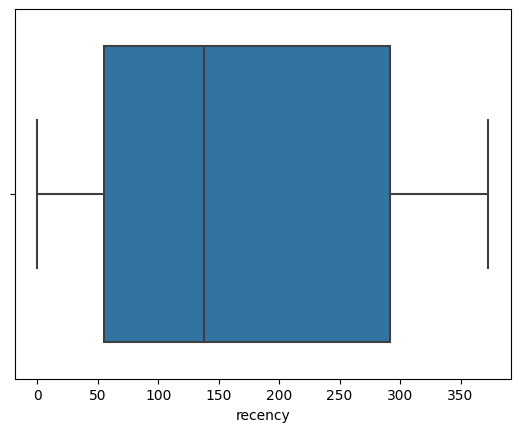

frequency: 


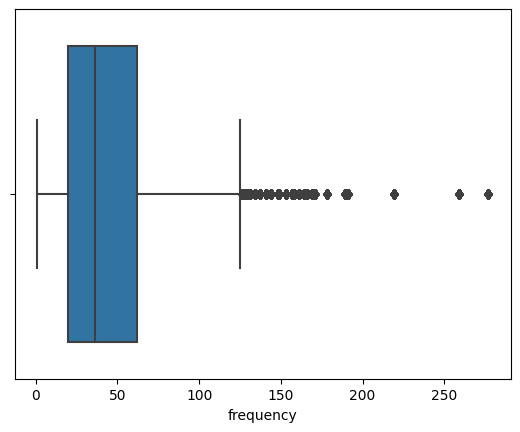

monetary_value: 


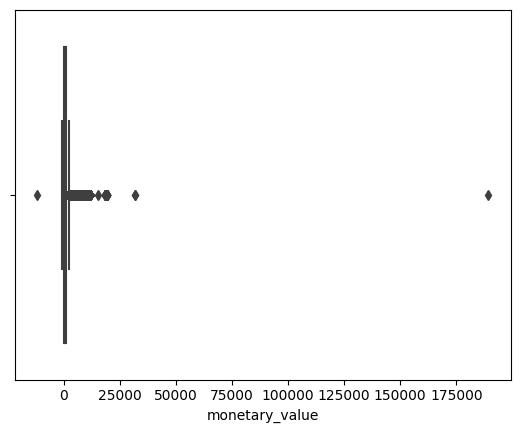

In [77]:
list1 = ['recency','frequency','monetary_value']

for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.show()

## **Outlier Removal**

In [80]:
# remove the customer id column
new_df = finaldf[['recency','frequency','monetary_value']]

# remove outliers
z_scores = stats.zscore(new_df)

In [81]:
z_scores

recency  frequency  monetary_value
0      -0.955294  -1.149226      121.512735
1      -1.300241  -0.402500        0.284075
2      -1.300241  -0.402500        0.284075
3      -1.300241  -0.402500        0.284075
4      -1.300241  -0.402500        0.284075
...          ...        ...             ...
100805  0.063118  -0.452282        0.036893
100806  0.063118  -0.452282        0.036893
100807  0.063118  -0.452282        0.036893
100808  0.063118  -0.452282        0.036893
100809  0.063118  -0.452282        0.036893

[100810 rows x 3 columns]

In [82]:
abs_z_scores = np.abs(z_scores)

In [83]:
abs_z_scores

recency  frequency  monetary_value
0       0.955294   1.149226      121.512735
1       1.300241   0.402500        0.284075
2       1.300241   0.402500        0.284075
3       1.300241   0.402500        0.284075
4       1.300241   0.402500        0.284075
...          ...        ...             ...
100805  0.063118   0.452282        0.036893
100806  0.063118   0.452282        0.036893
100807  0.063118   0.452282        0.036893
100808  0.063118   0.452282        0.036893
100809  0.063118   0.452282        0.036893

[100810 rows x 3 columns]

In [84]:
filtered_entries = (abs_z_scores < 3).all(axis=1)

In [85]:
filtered_entries

0         False
1          True
2          True
3          True
4          True
          ...  
100805     True
100806     True
100807     True
100808     True
100809     True
Length: 100810, dtype: bool

In [86]:
new_df = new_df[filtered_entries]

In [87]:
new_df.head()

recency  frequency  monetary_value
1        6         31         1246.73
2        6         31         1246.73
3        6         31         1246.73
4        6         31         1246.73
5        6         31         1246.73

## **Standardization**

In [89]:
new_df = new_df.drop_duplicates()

col_names = ['recency', 'frequency', 'monetary_value']
features = new_df[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

# **Model Implementation**

## **Optimal No Of Clusters**

C:\Users\c22080676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\c22080676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\c22080676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\c22080676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\c22080676\AppDa

Text(0, 0.5, 'Inertia')

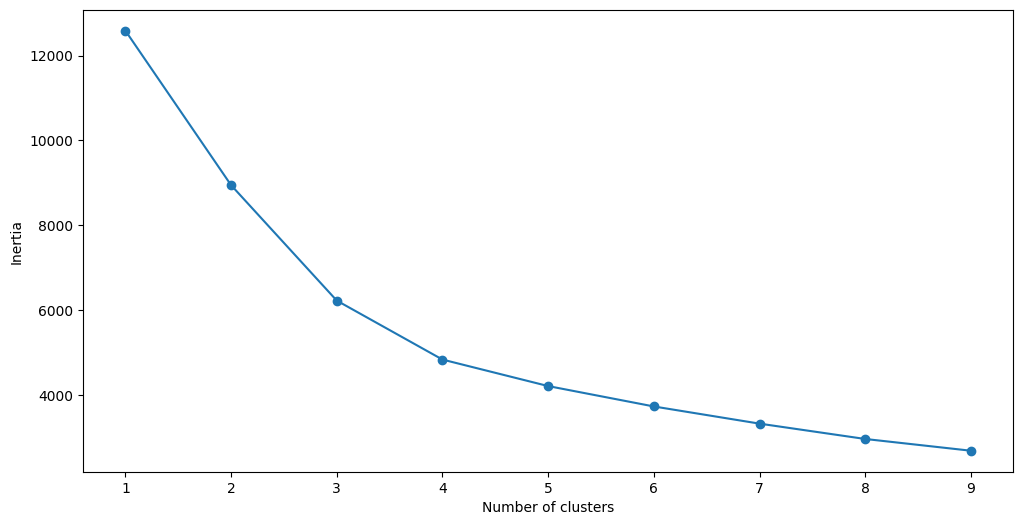

In [90]:
# Identify Optimal No. Of Clusters

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

SSE = []

for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})

plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## **kNN k=4**

In [93]:
model_01 = KMeans( n_clusters = 4, init='k-means++')
model_01.fit(scaled_features)

C:\Users\c22080676\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [94]:
# Score The Model
print(silhouette_score(scaled_features, model_01.labels_, metric='euclidean'))

0.4033412086006656


In [96]:
# Predict Classes For All Customers
pred = kmeans.predict(scaled_features)

frame = pd.DataFrame(new_df)
frame['cluster'] = pred

## **Visualize The Assigned Clusters**

In [97]:
list1

['recency', 'frequency', 'monetary_value']

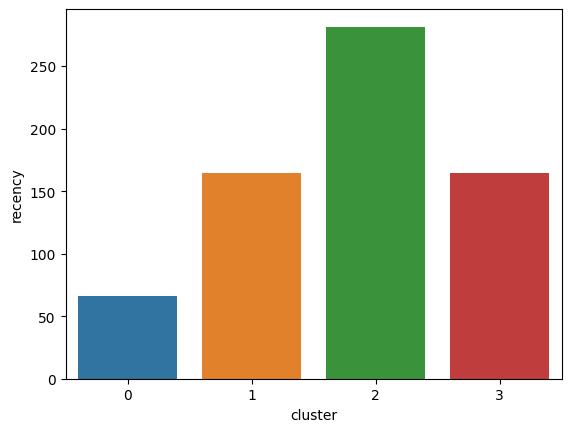

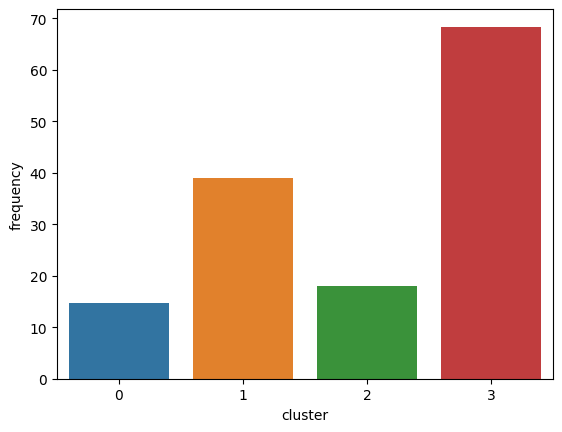

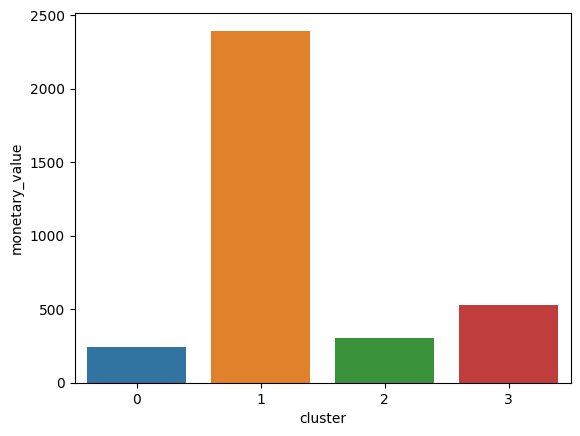

In [98]:
avg_df = frame.groupby(['cluster'], as_index=False).mean()

for i in list1:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()